In [17]:
import numpy as np
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer 

In [18]:
data = train = pd.read_csv('SPAM text message 20170820 - Data.csv')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [20]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
from sklearn import preprocessing

In [22]:
le = preprocessing.LabelEncoder()
data['Category']= le.fit_transform(data['Category']) 

In [23]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
s = data.Message.str.len()
print("maximum of messages:",s.max()," - and mean :",s.mean())

maximum of messages: 910  - and mean : 80.36898779612348


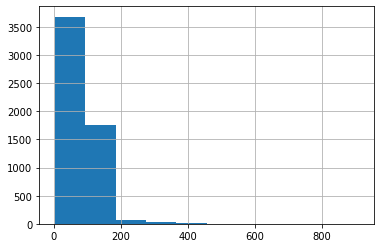

In [25]:
s.hist()

TRAIN MODEL

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
y  = data.Category
X = data.drop('Category',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

## Vectorize with tf-idf

In [35]:
n = X_train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )

trn_term_doc = vec.fit_transform(X_train['Message'])
test_term_doc = vec.transform(X_test['Message'])

print(trn_term_doc, test_term_doc)

  (0, 281)	0.4057767091630488
  (0, 909)	0.2838116651948303
  (0, 6158)	0.45848108611314875
  (0, 119)	0.2858297756335044
  (0, 280)	0.21341746846642123
  (0, 904)	0.19666632465369965
  (0, 1958)	0.42309555076339195
  (0, 4282)	0.2126011668229747
  (0, 6099)	0.16443880133658578
  (0, 6972)	0.3569576366226956
  (1, 3912)	0.1740657696189376
  (1, 1218)	0.1963661451001113
  (1, 2199)	0.20544277712982406
  (1, 204)	0.1818262444189121
  (1, 5783)	0.20052449412757423
  (1, 6826)	0.12965668926369392
  (1, 3238)	0.13543351801539064
  (1, 3193)	0.14739711508485406
  (1, 419)	0.09114598365350444
  (1, 1036)	0.16804627771249983
  (1, 2499)	0.15373211786434757
  (1, 5900)	0.1514511085774257
  (1, 2833)	0.1776678953914492
  (1, 3148)	0.164276077426628
  (1, 1258)	0.13932477701809373
  :	:
  (3730, 2592)	0.20754355764661978
  (3730, 2932)	0.1720510441686573
  (3730, 4889)	0.2200283599618286
  (3730, 109)	0.1954392986926086
  (3730, 3796)	0.19084852307097971
  (3730, 3112)	0.16991004684621017
  (3730

## FIT THE MODEL WITH  NAIVE BAYES

In [32]:
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [61]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(trn_term_doc,y_train)

# predict the labels on validation dataset
predictions_NB = Naive.predict(test_term_doc)

## accuracy 

In [62]:
# Use accuracy_score function to get the accuracy

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score ->  98.20554649265905


## END